In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
train_data.shape

(25000,)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
x_train[6]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
from keras import losses
from keras import metrics
from keras import optimizers

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 355us/step - loss: 0.5325 - acc: 0.7807 - val_loss: 0.4095 - val_acc: 0.8655
Epoch 2/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.3289 - acc: 0.9006 - val_loss: 0.3191 - val_acc: 0.8863
Epoch 3/20
10240/15000 [===================>..........] - ETA: 0s - loss: 0.2446 - acc: 0.9297- ETA: 1s - loss: 0.2460 - acc:

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['val_acc']) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.plot(epochs, acc_values, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'y', label='Validation Accuracy')

plt.title('Training and validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 4s 162us/step - loss: 0.4291 - accuracy: 0.8233
Epoch 2/4
25000/25000 [==============================] - 4s 156us/step - loss: 0.2489 - accuracy: 0.9118
Epoch 3/4
25000/25000 [==============================] - 4s 157us/step - loss: 0.1943 - accuracy: 0.9313
Epoch 4/4
25000/25000 [==============================] - 4s 156us/step - loss: 0.1656 - accuracy: 0.9407


In [13]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 6s 238us/step


In [14]:
model.predict(x_test)

array([[0.29605764],
       [0.9996455 ],
       [0.9753275 ],
       ...,
       [0.1710253 ],
       [0.10232997],
       [0.6647425 ]], dtype=float32)

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 404us/step - loss: 0.4740 - accuracy: 0.7908 - val_loss: 0.3274 - val_accuracy: 0.8746
Epoch 2/20
15000/15000 [==============================] - 5s 366us/step - loss: 0.2607 - accuracy: 0.9015 - val_loss: 0.2765 - val_accuracy: 0.8900
Epoch 3/20
15000/15000 [==============================] - 5s 344us/step - loss: 0.1835 - accuracy: 0.9341 - val_loss: 0.2868 - val_accuracy: 0.8844
Epoch 4/20
15000/15000 [==============================] - 5s 344us/step - loss: 0.1355 - accuracy: 0.9515 - val_loss: 0.3303 - val_accuracy: 0.8798
Epoch 5/20
15000/15000 [==============================] - 5s 344us/step - loss: 0.1086 - accuracy: 0.9611 - val_loss: 0.3498 - val_accuracy: 0.8708
Epoch 6/20
15000/15000 [==============================] - 5s 340us/step - loss: 0.0694 - accuracy: 0.9781 - val_loss: 0.3430 - val_accuracy: 0.8818
Epoch 7/20
15000/15000 [==============================] - 5s 3

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

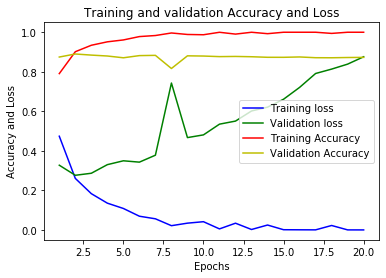

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['val_accuracy']) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.plot(epochs, acc_values, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'y', label='Validation Accuracy')

plt.title('Training and validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()

In [18]:
#Hyper parameters , turning the Hp during validation,where validaition mai max accuracy
#Optimization , kisi aik feacture ko dekh kar ous par decesion lay lay
#Generalize means to make something specified ,not recomended
#More same date means to specific.
#